In [1]:
import rugpeek_funcs as rp
import matplotlib.pyplot as plt
import numpy as np
import lmfit as lf
import matplotlib as mpl
import sys

In [2]:
data_file = "./example_data/Ferric-Mb_80uM_409nm_SHG_TA_2_matrix"

Now we are going to load this data file and create an object (called a `Rug` here for historical/joke reasons). This object contains all of the data in the file and also contains methods (things that work *on* the data). This paradigm is called **object oriented programming** - the idea is that most analysis methods only make sense in the context of the data actually existing - so we associate the analysis methods explicitly with the data.

In Python, what this means is we create a **class** of **objects**. The **object** has associated **attributes** (like, bits of data stored as part of the object), and **methods** (functions that work on the bits of data). There's a file in the folder `/useful_bits/` which contains a jupyter notebook introducing these ideas in a more simple way than directly through this program, which I made for a previous summer student - have a look at it.

The definition of the `Rug` class is made in the file `rugpeek_funcs.py`- have a look at it, as you'll be working with this later, but don't panic if it all looks insanely complex.

In [3]:
#JDP create an instance of the Rug class
data = rp.Rug(data_file, ".dat")

#JDP look at what kind of object this is:
type(data)

rugpeek_funcs.Rug

Clearly it's a `Rug` type object. You can see the attributes this object has:

In [11]:
vars(data)

{'wavelengths': array([346.587463, 347.405029, 348.222504, 349.039978, 349.857391,
        350.674774, 351.492065, 352.309357, 353.126556, 353.943726,
        354.760864, 355.577911, 356.394989, 357.211975, 358.028931,
        358.845795, 359.662659, 360.479462, 361.296204, 362.112946,
        362.929596, 363.746185, 364.562744, 365.379242, 366.19574 ,
        367.012115, 367.828491, 368.644806, 369.46109 , 370.277313,
        371.093475, 371.909607, 372.725647, 373.541687, 374.357635,
        375.173553, 375.989441, 376.805267, 377.621002, 378.436737,
        379.25238 , 380.067993, 380.883575, 381.699066, 382.514526,
        383.329926, 384.145294, 384.960571, 385.775818, 386.591003,
        387.406128, 388.221252, 389.036285, 389.851257, 390.666168,
        391.481049, 392.295868, 393.110596, 393.925354, 394.73999 ,
        395.554626, 396.369141, 397.183624, 397.998077, 398.812469,
        399.626801, 400.44104 , 401.25528 , 402.069427, 402.883545,
        403.697571, 404.511566, 4

This looks like a lot of stuff, but it's just four attributes that jupyter prints out in full. There's the time and wavelength axis of the associated spectrum, then the matrix of absorbance changes, and finally the filename. We can access an individual attribute like this:

In [ ]:
data.filename

There are also methods associated with this data object. We can see these (and the attributes) as below. The methods that start with a double underscore are inbuilt methods/attributes that Python internally keeps track of - the double underscore is just a convention. The methods we've added are the others. 

In [12]:
dir(data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'apply_dispersion_correction',
 'axis',
 'filename',
 'fit_dispersion_curve',
 'fit_time_trace',
 'get_dispersion_correction_eye',
 'get_t0_positions',
 'get_time_trace',
 'limit_times',
 'limit_wavelengths',
 'matrix',
 'peek',
 'peek_3D',
 'times',
 'wavelengths']

We can try to use one of these methods: `peek`. This method displays the data in the Rug object:

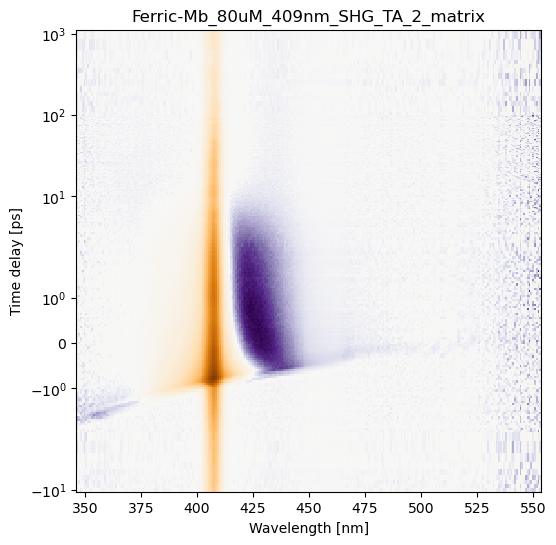

In [5]:
#JDP note that to use a method we put closing brackets () at the end of the method, whereas for an attribute we left them off.
data.peek()

Cool - there's a transient absorption spectrum. Another method we can use is one that lets us slice through at a certain wavelength and get the corresponding time trace. 

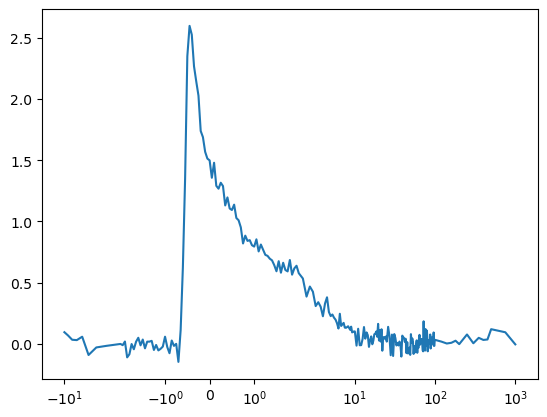

In [17]:
#JDP slice through at 440nm
timeslice = data.get_time_trace(450, plot=True)


array([-1.00e+01, -9.00e+00, -8.00e+00, -7.00e+00, -6.00e+00, -5.00e+00,
       -4.00e+00, -3.00e+00, -2.00e+00, -1.95e+00, -1.90e+00, -1.85e+00,
       -1.80e+00, -1.75e+00, -1.70e+00, -1.65e+00, -1.60e+00, -1.55e+00,
       -1.50e+00, -1.45e+00, -1.40e+00, -1.35e+00, -1.30e+00, -1.25e+00,
       -1.20e+00, -1.15e+00, -1.10e+00, -1.05e+00, -1.00e+00, -9.50e-01,
       -9.00e-01, -8.50e-01, -8.00e-01, -7.50e-01, -7.00e-01, -6.50e-01,
       -6.00e-01, -5.50e-01, -5.00e-01, -4.50e-01, -4.00e-01, -3.50e-01,
       -3.00e-01, -2.50e-01, -2.00e-01, -1.50e-01, -1.00e-01, -5.00e-02,
        0.00e+00,  5.00e-02,  1.00e-01,  1.50e-01,  2.00e-01,  2.50e-01,
        3.00e-01,  3.50e-01,  4.00e-01,  4.50e-01,  5.00e-01,  5.50e-01,
        6.00e-01,  6.50e-01,  7.00e-01,  7.50e-01,  8.00e-01,  8.50e-01,
        9.00e-01,  9.50e-01,  1.00e+00,  1.05e+00,  1.10e+00,  1.15e+00,
        1.20e+00,  1.25e+00,  1.30e+00,  1.35e+00,  1.40e+00,  1.45e+00,
        1.50e+00,  1.55e+00,  1.60e+00,  1.65e+00, 

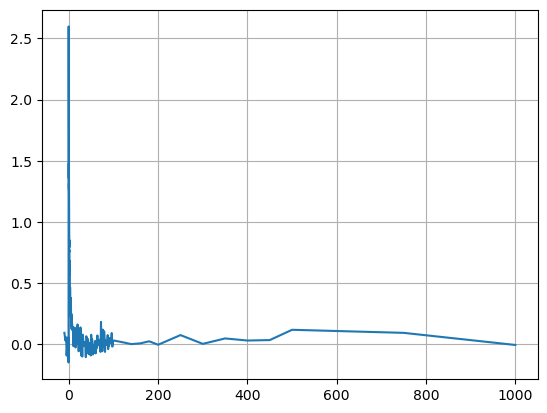

In [21]:
#JDP can you write the code to plot this trace against time - with labelled axes, and the time axis on a log scale?
plt.figure()
plt.plot(data.times, timeslice)
plt.xscale('linear')
plt.grid()
data.times